In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pydataset import data
import os
import env
import acquire 
import prepare

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Acquiring telco churn data

telco_df = acquire.get_telco_data()

In [3]:
telco_df.head()

,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
payment_type_id,,,,,,,,,,,,,,,,,,,,,
2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
# prepare telco_df
telco_df = prepare.prep_telco(telco_df)

In [5]:
# telco df
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,multiple_lines_no,multiple_lines_no phone service,multiple_lines_yes,online_security_no,online_security_no internet service,online_security_yes_internet,contract_type_month-to-month,contract_type_one year,contract_type_two year,churn_numeric
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,1,0,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,1,0,0,1,0,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,1,0,0,1,0,0,1,0,0,1
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,0,1,0,0,1,0,0,1
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,1,0,0,1,0,0,1


In [6]:
# Value counts for online security. Will remove No internet service before pulling dummies
telco_df.online_security.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

In [7]:
telco_df.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,multiple_lines_no,multiple_lines_no phone service,multiple_lines_yes,online_security_no,online_security_no internet service,online_security_yes_internet,contract_type_month-to-month,contract_type_one year,contract_type_two year,churn_numeric
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,1,0,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,1,0,0,1,0,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,1,0,0,1,0,0,1,0,0,1


In [8]:
# removing spaces from columns
telco_df.columns = [c.replace(' ','_') for c in telco_df.columns]

In [9]:
telco_df.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,multiple_lines_no,multiple_lines_no_phone_service,multiple_lines_yes,online_security_no,online_security_no_internet_service,online_security_yes_internet,contract_type_month-to-month,contract_type_one_year,contract_type_two_year,churn_numeric
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,1,0,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,1,0,0,1,0,0,0


In [10]:
# telco_df info. Checking column names
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          7043 non-null   object 
 1   gender                               7043 non-null   object 
 2   senior_citizen                       7043 non-null   int64  
 3   partner                              7043 non-null   object 
 4   dependents                           7043 non-null   object 
 5   tenure                               7043 non-null   int64  
 6   phone_service                        7043 non-null   object 
 7   multiple_lines                       7043 non-null   object 
 8   online_security                      7043 non-null   object 
 9   online_backup                        7043 non-null   object 
 10  device_protection                    7043 non-null   object 
 11  tech_support                  

In [11]:
# Splitting data. random state=123
train, validate, test = prepare.split_data(df=telco_df, target='churn')

In [12]:
train.shape, validate.shape, test.shape

((3943, 33), (1691, 33), (1409, 33))

## Q1. Are month-to-month contracts churning faster than 1yr and 2yr contracts?

### Visuals for Contracts vs Churn

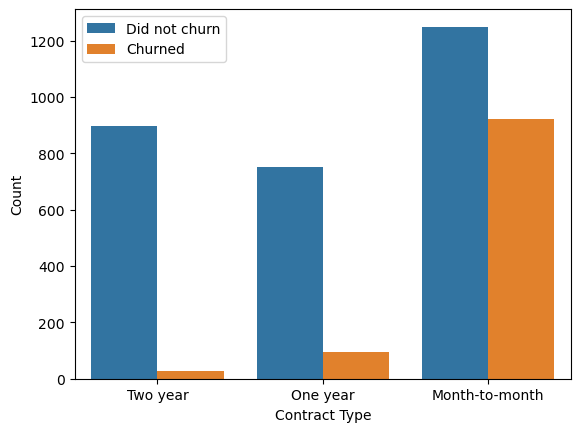

In [13]:
sns.countplot(x='contract_type', hue='churn', data=train)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(['Did not churn', 'Churned'])

### Crosstabs for Contracts vs. Churn

In [14]:
# Variables for contract lengths 
month = train['contract_type']== 'Month-to-month'
oneyear = train['contract_type']== 'One year'
twoyear = train['contract_type']== 'Two year'

In [15]:
# variable for churn
churn = train['churn']

In [16]:
# Crosstab for Mtm churn
mtm_ct = pd.crosstab(churn, month, colnames=['month-to-month'])
mtm_ct

month-to-month,False,True
churn,,
No,1648,1249
Yes,125,921


In [17]:
# Crosstab for 1yr churn
oneyear_ct = pd.crosstab(churn, oneyear, colnames=['one_year'])
oneyear_ct

one_year,False,True
churn,,
No,2144,753
Yes,950,96


In [18]:
# Crosstab for 2yr churn
twoyear_ct = pd.crosstab(churn, twoyear, colnames=['two_year'])
twoyear_ct

two_year,False,True
churn,,
No,2002,895
Yes,1017,29


### Stats Testing: Chi^2 test for Contract lenghts vs. Churn

H0: There is not a significant difference of churn rate and length of contracts.

Ha: There is a significant difference between churn rate and length of contracts.

Confidence interval: 95%

alpha = 0.05

In [19]:
# Mtm 
chi, p, degf, expected = stats.chi2_contingency(mtm_ct)
chi, p

(625.2758701470489, 5.32454352599958e-138)

In [20]:
# 1yr
chi, p, degf, expected = stats.chi2_contingency(oneyear_ct)
chi, p

(127.60978087886741, 1.3663034788444405e-29)

In [21]:
# 2yr
chi, p, degf, expected = stats.chi2_contingency(twoyear_ct)
chi, p

(337.16221680297303, 2.6478708937714996e-75)

<div class="alert alert-block alert-success">
<b> P-value is lower than 0.05 on all three Chi^2 tests, thus the null hypothesis on all three are rejected. <b>
<br>There is a signifcant difference between monthly charges of month-to-month contracts and 1yr/2yr contracts. <br>
    


## Q2. Does having the online security add-on services affect churn rate? (add other add-on services after MVP)

H0: There is no significant difference in churn rate when customers have the online security add-on services.

Ha: There is a significant difference in churn rate when customers have the online security add-on services. 

Confidence interval = 95%

alpha = 0.05

<AxesSubplot:xlabel='online_security', ylabel='count'>

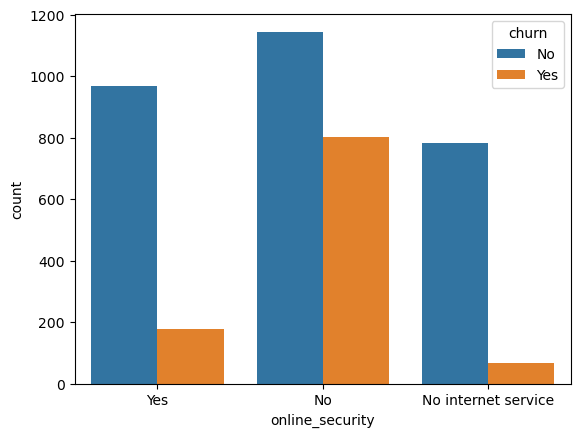

In [22]:
sns.countplot(x='online_security', hue='churn', data=train)

In [23]:
# Do not want to include 'No Internet Service'. Will use a boolean mask to get rid of it for the Chi^2 test.
train.online_security.value_counts()

No                     1946
Yes                    1148
No internet service     849
Name: online_security, dtype: int64

In [24]:
# Boolean Mask to remove 'No internet service'
online_sec = train[train['online_security'] != 'No internet service']

In [25]:
# Crosstab
online_sec_ct = pd.crosstab(online_sec['online_security'], online_sec['churn'])

In [26]:
# Chi^2 test for Online Security crosstab
chi, p, degf, expected = stats.chi2_contingency(online_sec_ct)
chi, p

(216.94350424593094, 4.1985954375412895e-49)

<AxesSubplot:xlabel='online_security', ylabel='count'>

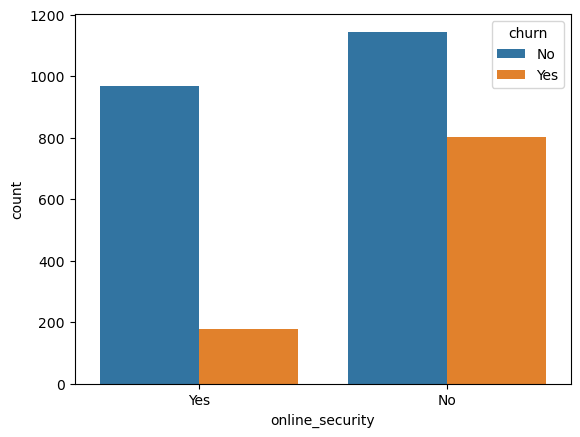

In [27]:
# Countplot with 'No internet service' removed
sns.countplot(x=online_sec['online_security'], hue=online_sec['churn'], data= online_sec)

<div class="alert alert-block alert-success">
<b> P-value is lower than 0.05, thus the null hypothesis is rejected. <b>
<br>There is a signifcant difference in churn rate when customers have online security service. <br>

## Q3. Does having multiple lines affect churn rate? 
***(multiple lines likely means more than one user is on the plan, maybe family, so I expect churn to be less since more people depend on the service)***

H0: There is no signifcant difference in churn rate when customers have multiple lines.

Ha: There is a significant difference in churn rate when customers have multiple lines.
    
Confidence interval = 95%abs

alpha = 0.05

<AxesSubplot:xlabel='multiple_lines', ylabel='count'>

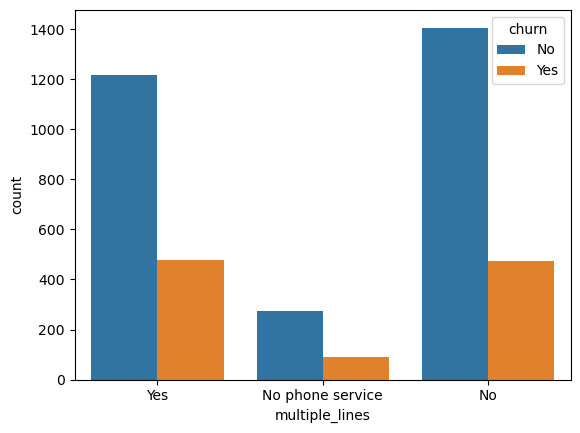

In [28]:
# Countplot for multiple lines. Has extra columnn 'No phone service'.
sns.countplot(x='multiple_lines', hue='churn', data=train)

In [29]:
# Boolean Mask to remove 'No phone service'.
mult_lines = train[train['multiple_lines'] != 'No phone service']

<AxesSubplot:xlabel='multiple_lines', ylabel='count'>

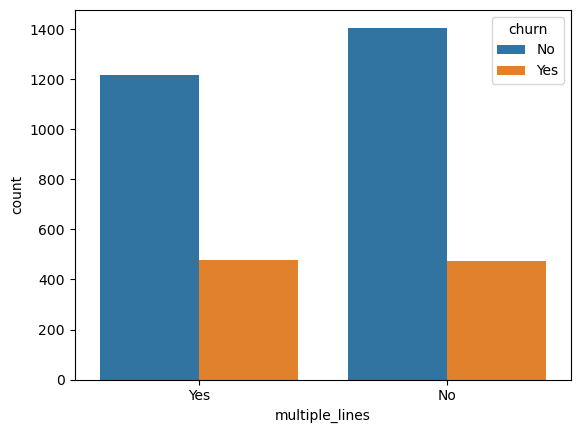

In [30]:
# Visual with Boolean Mask
sns.countplot(x='multiple_lines', hue='churn', data=mult_lines)

In [31]:
mult_lines_ct = pd.crosstab(mult_lines['multiple_lines'], mult_lines['churn'])
mult_lines_ct

churn,No,Yes
multiple_lines,,
No,1406,475
Yes,1218,479


In [32]:
chi, p, degf, expected = stats.chi2_contingency(mult_lines_ct)
chi, p

(3.884036752625903, 0.048747217941123785)

<div class="alert alert-block alert-success">
<b> P-value is lower than 0.05, thus the null hypothesis is rejected. <b>
<br>There is a signifcant difference in churn rate when customers have multiple lines.<br>

## Q4. Does having dependents affect churn rate?

H0: There is no significant difference in churn rate when customers have dependents.

Ha: There is a significant difference in churn rate when customers have dependents.
    
Cofidence interval = 95%

alpha = 0.05

<AxesSubplot:xlabel='dependents', ylabel='count'>

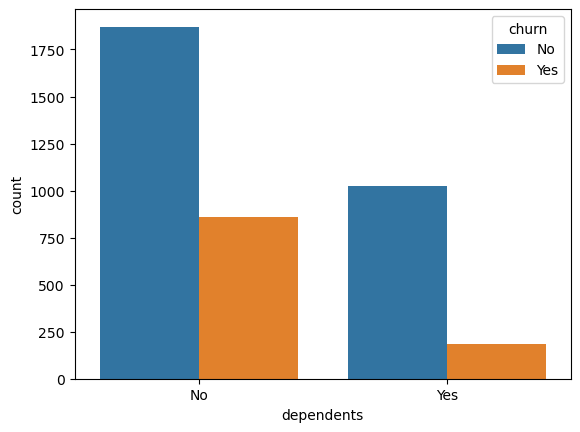

In [33]:
# Countplot for dependents and churn rate (try to find a way to add percentage in this chart or use another viz.)
sns.countplot(x='dependents', hue='churn', data=train)

In [34]:
deps_ct = pd.crosstab(train.dependents, train.churn)

In [35]:
chi, p, degf, expected = stats.chi2_contingency(deps_ct)
chi, p

(110.161868173847, 9.030713272299022e-26)

<div class="alert alert-block alert-success">
<b> P-value is lower than 0.05, thus the null hypothesis is rejected. <b>
<br>There is a significant difference in churn rate when customers have dependents.<br>

## Machine Learning Models

<b> Drivers I will be moving forward with: <b>

<br>Month-to-month vs 1yr/ Month-to-month vs. 2yr<br>
<br>Online Security add-on service<br>
<br>Multiple lines<br>
<br>Dependents<br>


### Baseline Accuracy

In [36]:
# Baseline will be 'no' = 0 for churn
baseline_df = train
baseline_df['baseline'] = 0
baseline_df['churn_numeric'] = train.churn.str.replace('No','0').str.replace('Yes','1').astype(int)

In [37]:
# accuracy of baseline
accuracy_score(baseline_df.churn_numeric, baseline_df.baseline)

0.7347197565305605

In [38]:
# Dropped baseline column
train = train.drop(['baseline'], axis=1)

<div class="alert alert-block alert-success">
<b> Baseline Accuracy = 73.5% <b>


In [39]:
train.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,multiple_lines_no,multiple_lines_no_phone_service,multiple_lines_yes,online_security_no,online_security_no_internet_service,online_security_yes_internet,contract_type_month-to-month,contract_type_one_year,contract_type_two_year,churn_numeric
5310,7503-MIOGA,Female,1,Yes,No,72,Yes,Yes,Yes,Yes,...,0,0,1,0,0,1,0,0,1,0
3790,5329-KRDTM,Male,1,Yes,No,72,Yes,Yes,No,Yes,...,0,0,1,1,0,0,0,0,1,0


In [40]:
train

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,multiple_lines_no,multiple_lines_no_phone_service,multiple_lines_yes,online_security_no,online_security_no_internet_service,online_security_yes_internet,contract_type_month-to-month,contract_type_one_year,contract_type_two_year,churn_numeric
5310,7503-MIOGA,Female,1,Yes,No,72,Yes,Yes,Yes,Yes,...,0,0,1,0,0,1,0,0,1,0
3790,5329-KRDTM,Male,1,Yes,No,72,Yes,Yes,No,Yes,...,0,0,1,1,0,0,0,0,1,0
4398,6199-IWKGC,Female,1,Yes,No,46,Yes,Yes,No,No,...,0,0,1,1,0,0,0,1,0,0
2635,3748-FVMZZ,Male,0,No,No,4,No,No phone service,No,No,...,0,1,0,1,0,0,1,0,0,0
2986,4280-DLSHD,Male,0,Yes,No,8,Yes,No,No,Yes,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6230,8809-RIHDD,Male,0,Yes,Yes,72,Yes,Yes,No,Yes,...,0,0,1,1,0,0,0,0,1,1
356,0523-VNGTF,Female,1,No,No,52,No,No phone service,No,Yes,...,0,1,0,1,0,0,1,0,0,0
2128,3058-HJCUY,Male,0,Yes,Yes,41,Yes,Yes,No,No,...,0,0,1,1,0,0,0,1,0,1
3586,5081-NWSUP,Female,0,No,No,10,Yes,No,No,Yes,...,1,0,0,1,0,0,0,1,0,0


In [41]:
# copy of test data to make csv later
test_csv = test

In [42]:
# Dropping all 'Object' dtypes
train = train.select_dtypes(exclude=['object'])
validate = validate.select_dtypes(exclude=['object'])
test= test.select_dtypes(exclude=['object'])


In [43]:
# X and y model variables
X_train = train.drop(['churn_numeric'], axis=1)
y_train = train.churn_numeric

X_validate = validate.drop(['churn_numeric'], axis=1)
y_validate = validate.churn_numeric

X_test = test.drop(['churn_numeric'], axis=1)
y_test = test.churn_numeric

### Decision Tree Model

In [44]:
# Create Decision Tree Model Object
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

In [45]:
# Fit Decision Tree Model
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [46]:
clf.score(X_train,y_train)

0.792036520415927

In [47]:
clf.score(X_validate, y_validate)

0.7965700768775872

In [48]:
for i in range(2,11):
    clf = DecisionTreeClassifier(max_depth=i, random_state=123)
    clf.fit(X_train,y_train)
    train_acc = clf.score(X_train, y_train)
    val_acc = clf.score(X_validate, y_validate)
    print(f' Tree with depth of {i}. Training acc: {round(train_acc,5)}, Validate acc: {round(val_acc,5)}')
    print('------------------------------------------------')   
    print()
    

 Tree with depth of 2. Training acc: 0.74968, Validate acc: 0.75695
------------------------------------------------

 Tree with depth of 3. Training acc: 0.78519, Validate acc: 0.78533
------------------------------------------------

 Tree with depth of 4. Training acc: 0.79204, Validate acc: 0.79657
------------------------------------------------

 Tree with depth of 5. Training acc: 0.79686, Validate acc: 0.7877
------------------------------------------------

 Tree with depth of 6. Training acc: 0.80649, Validate acc: 0.79361
------------------------------------------------

 Tree with depth of 7. Training acc: 0.81689, Validate acc: 0.77705
------------------------------------------------

 Tree with depth of 8. Training acc: 0.83008, Validate acc: 0.77351
------------------------------------------------

 Tree with depth of 9. Training acc: 0.84707, Validate acc: 0.76523
------------------------------------------------

 Tree with depth of 10. Training acc: 0.87192, Validate a

In [49]:
metrics = []

for i in range (2,11):
    clf = DecisionTreeClassifier(max_depth=i, random_state=123)
    clf.fit(X_train,y_train)
    train_acc = clf.score(X_train, y_train)
    val_acc = clf.score(X_validate, y_validate)
    
    output = {
        'max_depth': i,
        'train_accuracy': train_acc,
        'validate_accuracy': val_acc
    }
    
    metrics.append(output)

df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.749683,0.756949,-0.007266
1,3,0.785189,0.785334,-0.000145
2,4,0.792037,0.796570,-0.004534
3,5,0.796855,0.787700,0.009156
4,6,0.806493,0.793613,0.012879
5,7,0.816891,0.777055,0.039836
6,8,0.830079,0.773507,0.056572
7,9,0.847071,0.765228,0.081843
8,10,0.871925,0.759905,0.112020


Text(0, 0.5, 'Accuracy')

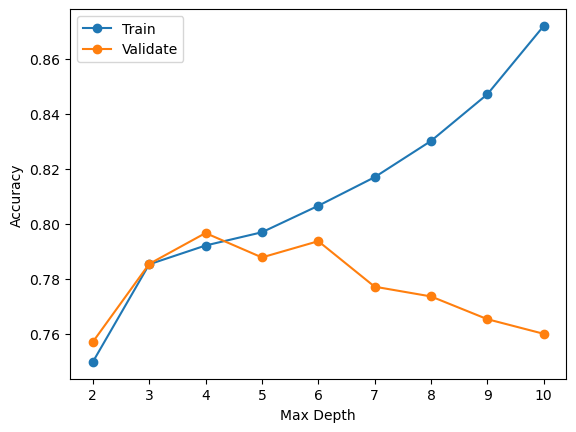

In [50]:
plt.plot(df.max_depth, df.train_accuracy, marker='o', label='Train')
plt.plot(df.max_depth, df.validate_accuracy, marker='o', label='Validate')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

### Random Forest Model

In [51]:
rf = RandomForestClassifier(max_depth=7, min_samples_leaf=2, random_state=123)

In [52]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, random_state=123)

In [53]:
rf.score(X_train, y_train)

0.8115647983768705

In [54]:
rf.score(X_validate, y_validate)

0.804849201655825

In [55]:
# Random Forest Loop
for i in range (2,11):
    rf = RandomForestClassifier(max_depth=i, min_samples_leaf=3, random_state=123)
    rf.fit(X_train, y_train)
    train_acc = rf.score(X_train, y_train)
    val_acc = rf.score(X_validate, y_validate)
    print(f' Random Forest with depth of {i} and minimum 2 leaf samples. Training acc: {round(train_acc,5)}, Validate acc: {round(val_acc,5)}')
    print('------------------------------------------------')   
    print()

 Random Forest with depth of 2 and minimum 2 leaf samples. Training acc: 0.73472, Validate acc: 0.73448
------------------------------------------------

 Random Forest with depth of 3 and minimum 2 leaf samples. Training acc: 0.78164, Validate acc: 0.78474
------------------------------------------------

 Random Forest with depth of 4 and minimum 2 leaf samples. Training acc: 0.79254, Validate acc: 0.79302
------------------------------------------------

 Random Forest with depth of 5 and minimum 2 leaf samples. Training acc: 0.79762, Validate acc: 0.80012
------------------------------------------------

 Random Forest with depth of 6 and minimum 2 leaf samples. Training acc: 0.80573, Validate acc: 0.80781
------------------------------------------------

 Random Forest with depth of 7 and minimum 2 leaf samples. Training acc: 0.81055, Validate acc: 0.80485
------------------------------------------------

 Random Forest with depth of 8 and minimum 2 leaf samples. Training acc: 0.8

In [56]:
metrics = []

for i in range (2,11):
    rf = RandomForestClassifier(max_depth=i, min_samples_leaf=3, random_state=123)
    rf.fit(X_train, y_train)
    train_acc = rf.score(X_train, y_train)
    val_acc = rf.score(X_validate, y_validate)
    
    output = {
        'max_depth': i,
        'train_accuracy': train_acc,
        'validate_accuracy': val_acc
    }
    
    metrics.append(output)

df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df


,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.734720,0.734477,0.000243
1,3,0.781638,0.784743,-0.003104
2,4,0.792544,0.793022,-0.000478
3,5,0.797616,0.800118,-0.002502
4,6,0.805732,0.807806,-0.002074
5,7,0.810550,0.804849,0.005701
6,8,0.823485,0.804258,0.019227
7,9,0.832868,0.797161,0.035707
8,10,0.840477,0.803666,0.036810


Text(0, 0.5, 'Accuracy')

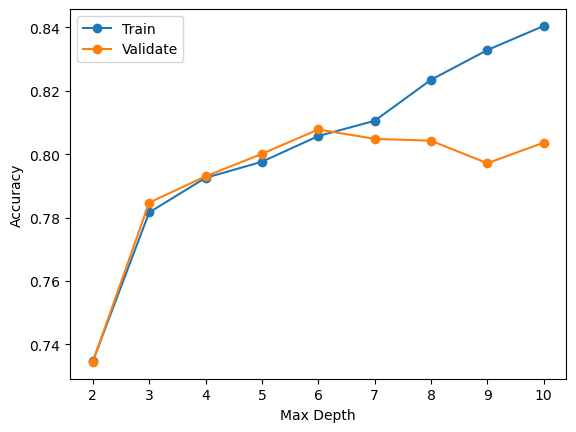

In [57]:
plt.plot(df.max_depth, df.train_accuracy, marker='o', label='Train')
plt.plot(df.max_depth, df.validate_accuracy, marker='o', label='Validate')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

### KNN Model

In [58]:
# Create KNN Object
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [59]:
# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
knn.score(X_train, y_train)

0.8394623383210753

In [61]:
for i in range(15,35):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(X_train, y_train)
    train_acc = knn.score(X_train, y_train)
    val_acc = knn.score(X_validate, y_validate)
    
    print(f' KNN model with {i} neighbors. Train Acc: {round(train_acc, 5)}, Validate Acc: {round(val_acc, 5)}')
    print('---------------------------------------------------------------')
    print()

 KNN model with 15 neighbors. Train Acc: 0.80548, Validate Acc: 0.7806
---------------------------------------------------------------

 KNN model with 16 neighbors. Train Acc: 0.80624, Validate Acc: 0.78711
---------------------------------------------------------------

 KNN model with 17 neighbors. Train Acc: 0.80345, Validate Acc: 0.78415
---------------------------------------------------------------

 KNN model with 18 neighbors. Train Acc: 0.80497, Validate Acc: 0.78179
---------------------------------------------------------------

 KNN model with 19 neighbors. Train Acc: 0.8037, Validate Acc: 0.78119
---------------------------------------------------------------

 KNN model with 20 neighbors. Train Acc: 0.80472, Validate Acc: 0.78356
---------------------------------------------------------------

 KNN model with 21 neighbors. Train Acc: 0.80294, Validate Acc: 0.78415
---------------------------------------------------------------

 KNN model with 22 neighbors. Train Acc: 0.

In [62]:
# Visual aid to see model performances
metrics = []

for i in range(5,35):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(X_train, y_train)
    train_acc = knn.score(X_train, y_train)
    val_acc = knn.score(X_validate, y_validate)
    
    output = {
        'neighbors': i,
        'train_accuracy': train_acc,
        'validate_accuracy': val_acc
    }
    
    metrics.append(output)

df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df


,neighbors,train_accuracy,validate_accuracy,difference
0,5,0.839462,0.762271,0.077191
1,6,0.828303,0.769959,0.058345
2,7,0.823231,0.773507,0.049724
3,8,0.816383,0.780012,0.036372
4,9,0.816891,0.783560,0.033331
5,10,0.812833,0.782969,0.029864
6,11,0.812072,0.779420,0.032652
7,12,0.812579,0.785334,0.027245
8,13,0.806746,0.781786,0.024960
9,14,0.807761,0.784743,0.023018


Text(0, 0.5, 'Accuracy')

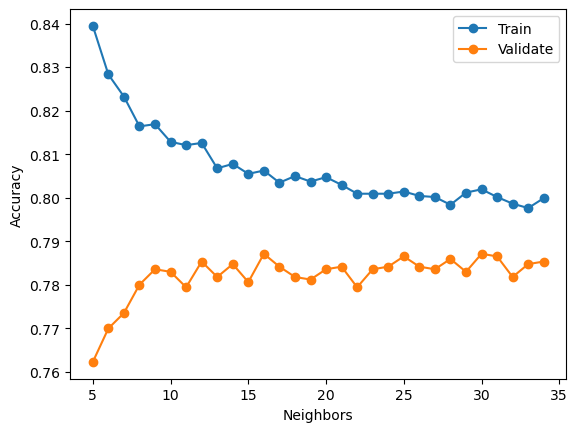

In [63]:
plt.plot(df.neighbors, df.train_accuracy, marker='o', label='Train')
plt.plot(df.neighbors, df.validate_accuracy, marker='o', label='Validate')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')

### Logistic Regression Model

In [64]:
# Logistic Regression Model Object
logit = LogisticRegression(random_state=123, penalty='l2', max_iter=100, solver='liblinear')

In [65]:
# Fit the model
logit.fit(X_train, y_train)

LogisticRegression(random_state=123, solver='liblinear')

In [66]:
logit.score(X_train, y_train)

0.7925437484149125

In [67]:
logit.score(X_validate, y_validate)

0.7989355410999409

### Random Forest Test Model

In [68]:
rf = RandomForestClassifier(max_depth=7, min_samples_leaf=2, random_state=123)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, random_state=123)

In [69]:
rf.score(X_test, y_test)

0.7970191625266146

## Prediction .csv

In [70]:
pred_test = rf.predict_proba(X_test)
pred_test

array([[0.88163923, 0.11836077],
       [0.95476174, 0.04523826],
       [0.59686841, 0.40313159],
       ...,
       [0.99174033, 0.00825967],
       [0.98964211, 0.01035789],
       [0.48673907, 0.51326093]])

In [71]:
pred_csv = pd.DataFrame(pred_test)
pred_csv.head()

,0,1
0,0.881639,0.118361
1,0.954762,0.045238
2,0.596868,0.403132
3,0.634522,0.365478
4,0.222683,0.777317


In [72]:
concat_this = test_csv.customer_id
concat_this.head()

3160    4531-AUZNK
1577    2296-DKZFP
6823    9692-TUSXH
3615    5129-JLPIS
882     1273-MTETI
Name: customer_id, dtype: object

In [73]:
concat_this = pd.DataFrame(concat_this)
concat_this.head()

,customer_id
3160,4531-AUZNK
1577,2296-DKZFP
6823,9692-TUSXH
3615,5129-JLPIS
882,1273-MTETI


In [74]:
zzz = concat_this.reset_index()
zzz.head()

,index,customer_id
0,3160,4531-AUZNK
1,1577,2296-DKZFP
2,6823,9692-TUSXH
3,3615,5129-JLPIS
4,882,1273-MTETI


In [75]:
zzz.drop(columns='index', inplace=True)

In [76]:
zzz.head()

,customer_id
0,4531-AUZNK
1,2296-DKZFP
2,9692-TUSXH
3,5129-JLPIS
4,1273-MTETI


In [77]:
pred_csv = pd.concat([zzz,pred_csv], axis=1)

In [78]:
pred_csv = pred_csv.rename(columns={0:'probability_no_churn', 1: 'probability_yes_churn'})

In [79]:
pred_csv.head()

,customer_id,probability_no_churn,probability_yes_churn
0,4531-AUZNK,0.881639,0.118361
1,2296-DKZFP,0.954762,0.045238
2,9692-TUSXH,0.596868,0.403132
3,5129-JLPIS,0.634522,0.365478
4,1273-MTETI,0.222683,0.777317


In [80]:
pred_csv['prediction'] = pred_csv.probability_yes_churn > 0.5

In [81]:
pred_csv.prediction = pred_csv.prediction.astype(int)

In [82]:
pred_csv.prediction = pred_csv.prediction.replace(0, 'no')

In [83]:
pred_csv.prediction = pred_csv.prediction.replace(1,'yes')

In [84]:
pred_csv = pred_csv.drop('probability_no_churn', axis=1)

In [85]:
pred_csv.to_csv('predictions2.csv')